In [405]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import math
from sklearn import ensemble
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, precision_recall_curve


In [293]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [312]:
train_df = pd.read_csv('Train_Clean_data.csv')
target = pd.read_csv('train.csv')
test_df = pd.read_csv('Test_Clean_data.csv', index_col=0)

In [313]:
phys_col = ['PHY338032', 'PHY341578', 'PHY357120', 'PHY330576',
       'PHY337425', 'PHY314027', 'PHY327046', 'PHY412132', 'PHY350277',
       'PHY423534']

for col in phys_col:
    train_df.drop(col, inplace=True, axis=1)

train_df.head()

,Provider,ClaimID,DOD,ClmAdmitDiagnosisCode,Inpatient,ClmProcedureCode,ClmProcedureCode_count,ClmDiagnosisCode_count,RenalDiseaseIndicator,duplicate,V5869_diagcode,Other_diagcode,V5861_diagcode,2724_diagcode,4011_diagcode,2449_diagcode,4019_diagcode,25000_diagcode,42731_diagcode,None_PHY,Patient_Connections,AttPhys_Connections,InscClaimAmtReimbursed,DeductibleAmtPaid,treatment_days,Gender,IPAnnualReimbursementAmt,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,num_chronic,Age,claim_Days
0,PRV51001,25,0,11,5.0,2.0,3.0,80.0,8.0,12,1,25,0,2,0,1,3,1,2,0,24.0,14.0,4185.600000,213.600000,1.000000,0.640000,17606.000000,12.000000,12.000000,897.120000,2615.200000,463.920000,5.560000,77.880000,1.440000
1,PRV51003,132,1,78,62.0,39.0,48.0,693.0,29.0,30,7,132,6,16,3,12,25,15,11,0,117.0,44.0,4588.409091,502.166667,2.424242,0.590909,7568.181818,11.818182,11.871212,931.424242,2678.181818,737.121212,4.545455,69.083333,3.674242
2,PRV51004,149,1,28,0.0,0.0,0.0,385.0,23.0,76,2,149,4,12,6,8,22,8,3,0,138.0,38.0,350.134228,2.080537,0.000000,0.691275,4351.879195,11.865772,11.959732,434.953020,2194.899329,622.751678,4.342282,71.261745,1.429530
3,PRV51005,1165,4,252,0.0,0.0,0.0,3016.0,259.0,565,56,1165,47,73,62,30,140,54,23,2,495.0,7.0,241.124464,3.175966,0.000000,0.561373,3623.991416,11.907296,11.939914,379.162232,2109.733906,636.328755,4.335622,69.526180,1.088412
4,PRV51007,72,1,17,3.0,1.0,1.0,215.0,11.0,31,2,72,7,5,3,6,10,6,2,0,58.0,10.0,468.194444,45.333333,0.222222,0.527778,3050.000000,11.833333,11.833333,445.000000,1729.722222,469.722222,4.166667,68.305556,0.958333


In [314]:
print(train_df.shape)
print(target.shape)
print(test_df.shape)

(5410, 35)
(5410, 2)
(1353, 44)


In [315]:
target['PotentialFraud'].replace({'No':0, 'Yes':1}, inplace=True)
target.head()

,Provider,PotentialFraud
0,PRV51001,0
1,PRV51003,1
2,PRV51004,0
3,PRV51005,1
4,PRV51007,0


Text(0, 0.5, 'Frequency')

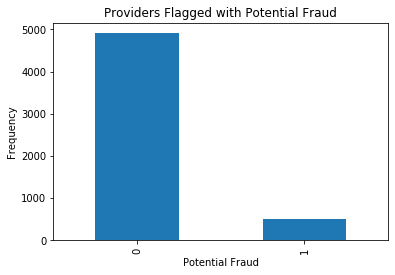

In [317]:
target['PotentialFraud'].value_counts().plot(kind = 'bar')
plt.title("Providers Flagged with Potential Fraud")
plt.xlabel("Potential Fraud")
plt.ylabel("Frequency")

In [318]:
final_df = pd.merge(train_df, target, on='Provider')

In [319]:
final_df.drop('Provider', axis=1, inplace=True)

In [320]:
final_df.head()

,ClaimID,DOD,ClmAdmitDiagnosisCode,Inpatient,ClmProcedureCode,ClmProcedureCode_count,ClmDiagnosisCode_count,RenalDiseaseIndicator,duplicate,V5869_diagcode,Other_diagcode,V5861_diagcode,2724_diagcode,4011_diagcode,2449_diagcode,4019_diagcode,25000_diagcode,42731_diagcode,None_PHY,Patient_Connections,AttPhys_Connections,InscClaimAmtReimbursed,DeductibleAmtPaid,treatment_days,Gender,IPAnnualReimbursementAmt,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,num_chronic,Age,claim_Days,PotentialFraud
0,25,0,11,5.0,2.0,3.0,80.0,8.0,12,1,25,0,2,0,1,3,1,2,0,24.0,14.0,4185.600000,213.600000,1.000000,0.640000,17606.000000,12.000000,12.000000,897.120000,2615.200000,463.920000,5.560000,77.880000,1.440000,0
1,132,1,78,62.0,39.0,48.0,693.0,29.0,30,7,132,6,16,3,12,25,15,11,0,117.0,44.0,4588.409091,502.166667,2.424242,0.590909,7568.181818,11.818182,11.871212,931.424242,2678.181818,737.121212,4.545455,69.083333,3.674242,1
2,149,1,28,0.0,0.0,0.0,385.0,23.0,76,2,149,4,12,6,8,22,8,3,0,138.0,38.0,350.134228,2.080537,0.000000,0.691275,4351.879195,11.865772,11.959732,434.953020,2194.899329,622.751678,4.342282,71.261745,1.429530,0
3,1165,4,252,0.0,0.0,0.0,3016.0,259.0,565,56,1165,47,73,62,30,140,54,23,2,495.0,7.0,241.124464,3.175966,0.000000,0.561373,3623.991416,11.907296,11.939914,379.162232,2109.733906,636.328755,4.335622,69.526180,1.088412,1
4,72,1,17,3.0,1.0,1.0,215.0,11.0,31,2,72,7,5,3,6,10,6,2,0,58.0,10.0,468.194444,45.333333,0.222222,0.527778,3050.000000,11.833333,11.833333,445.000000,1729.722222,469.722222,4.166667,68.305556,0.958333,0


In [321]:
target = final_df['PotentialFraud']
final_df.drop('PotentialFraud', axis=1, inplace=True)

In [322]:
X_train, X_test, y_train, y_test = train_test_split(final_df, target, test_size=0.2, random_state=0)

In [323]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4328, 34), (4328,), (1082, 34), (1082,))

In [324]:
randomForest = ensemble.RandomForestClassifier()
randomForest.set_params(n_estimators=50, random_state=10)
randomForest.fit(X_train, y_train)  
randomForest.score(X_train, y_train) 

0.9995378927911276

In [325]:
y_pred = randomForest.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[972  19]
 [ 45  46]] 

Area Under the Curve: 0.7431609762588571
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       991
           1       0.71      0.51      0.59        91

    accuracy                           0.94      1082
   macro avg       0.83      0.74      0.78      1082
weighted avg       0.93      0.94      0.94      1082
 



### Random Forest with Grid Search Cross Validation
roc_auc scoring

In [326]:
# set the parameter grid
grid_para_forest = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31),
    'n_estimators': range(10, 110, 10)
}

In [327]:
randomForest2 = ensemble.RandomForestClassifier()
grid_search_forest = ms.GridSearchCV(randomForest2, grid_para_forest, scoring='roc_auc', cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

CPU times: user 18.6 s, sys: 1.48 s, total: 20.1 s
Wall time: 8min 54s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [328]:
# get the best parameters
grid_search_forest.best_params_

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 100}

In [329]:
# get the best score
grid_search_forest.best_score_

0.9338042373411295

In [330]:
y_pred = grid_search_forest.best_estimator_.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[973  18]
 [ 49  42]] 

Area Under the Curve: 0.7216874951486455
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       991
           1       0.70      0.46      0.56        91

    accuracy                           0.94      1082
   macro avg       0.83      0.72      0.76      1082
weighted avg       0.93      0.94      0.93      1082
 



### Random Forest with Class Weight and Best Parameters from GridSearchCV

#### Random Forest with "balanced" Class Weight
Accuracy: 0.90, Best AUC: 0.832, Recall: 0.75

In [331]:
# Class Weight = 'balanced'
randomForest3 = ensemble.RandomForestClassifier()
randomForest3.set_params(criterion = 'gini', max_depth = 7, n_estimators = 100, class_weight = 'balanced')
randomForest3.fit(X_train, y_train) # fit 
randomForest3.score(X_train, y_train)


0.9336876155268022

In [332]:
y_pred = randomForest3.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[910  81]
 [ 23  68]] 

Area Under the Curve: 0.83275856333374
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       991
           1       0.46      0.75      0.57        91

    accuracy                           0.90      1082
   macro avg       0.72      0.83      0.76      1082
weighted avg       0.93      0.90      0.91      1082
 



#### Random Forest with "balanced_subsample" Class Weight

In [337]:
# Class Weight = balanced_subsample
# This is the same as “balanced” except that weights are computed based on 
# the bootstrap sample for every tree grown

randomForest4 = ensemble.RandomForestClassifier()
randomForest4.set_params(criterion = 'gini', max_depth = 7, n_estimators = 100, class_weight = 'balanced_subsample')
randomForest4.fit(X_train, y_train) # fit 
randomForest4.score(X_train, y_train)


0.9371534195933456

In [338]:
y_pred = randomForest4.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[912  79]
 [ 24  67]] 

Area Under the Curve: 0.828273139574855
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.95       991
           1       0.46      0.74      0.57        91

    accuracy                           0.90      1082
   macro avg       0.72      0.83      0.76      1082
weighted avg       0.93      0.90      0.91      1082
 



#### Random Forest with Manual Class Weight

In [335]:
target.value_counts()

0    4904
1     506
Name: PotentialFraud, dtype: int64

In [336]:
print(506/4904)
# Class 1 is about 10 times more prevalent than class 0

0.10318107667210441


In [339]:
randomForest5 = ensemble.RandomForestClassifier()
randomForest5.set_params(criterion = 'gini', max_depth = 7, n_estimators = 100, class_weight = {0:1, 1:10})
randomForest5.fit(X_train, y_train)
randomForest5.score(X_train, y_train)

0.9311460258780037

In [340]:
y_pred = randomForest5.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[904  87]
 [ 25  66]] 

Area Under the Curve: 0.8187423071378672
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       991
           1       0.43      0.73      0.54        91

    accuracy                           0.90      1082
   macro avg       0.70      0.82      0.74      1082
weighted avg       0.93      0.90      0.91      1082
 



### Grid Search with "roc_auc" scoring and "balanced" Class Weight
'balanced" class weight resulted in the best AUC. To be sure, cross validate with 'balanced' class weight. Gird Search CV was also applied to other class weight, but they resulted in worst metric scores

In [341]:
randomForest6 = ensemble.RandomForestClassifier(class_weight = 'balanced')
grid_search_forest2 = ms.GridSearchCV(randomForest6, grid_para_forest, scoring='roc_auc', cv=5, n_jobs=-1)
%time grid_search_forest2.fit(X_train, y_train)


CPU times: user 19.6 s, sys: 2.68 s, total: 22.3 s
Wall time: 8min 17s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [342]:
grid_search_forest2.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 60}

In [343]:
grid_search_forest2.best_score_

0.9320984715926153

In [344]:
y_pred = grid_search_forest2.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[870 121]
 [ 14  77]] 

Area Under the Curve: 0.8620274780718777
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.88      0.93       991
           1       0.39      0.85      0.53        91

    accuracy                           0.88      1082
   macro avg       0.69      0.86      0.73      1082
weighted avg       0.93      0.88      0.89      1082
 



In [403]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax= plt.subplot()
    sns.heatmap(cm/np.sum(cm), annot=labels, ax = ax, fmt='', cmap = "Blues"); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix with Random Forest')
    ax.xaxis.set_ticklabels(['Not Fraud', 'Potential Fraud']); ax.yaxis.set_ticklabels(['Not Fraud', 'Potential Fraud'])
    return


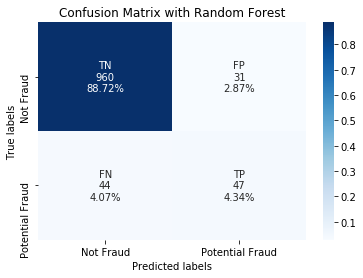

In [404]:
plot_cm(y_test, y_pred)

### Feature Importance from Model with Best Metrics
###### 'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 60, class_weight = 'balanced'
###### Accuracy: 0.88, Best AUC: 0.862, Recall: 0.85

In [345]:
# Showing 20 most important features
feature_importance = list(zip(final_df.columns, randomForest3.feature_importances_))
dtype = [('feature', 'S30'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
[i for (i, j) in feature_sort[0:20]]

[b'ClmProcedureCode_count',
 b'ClmProcedureCode',
 b'Inpatient',
 b'ClmAdmitDiagnosisCode',
 b'ClmDiagnosisCode_count',
 b'4019_diagcode',
 b'InscClaimAmtReimbursed',
 b'treatment_days',
 b'25000_diagcode',
 b'2449_diagcode',
 b'duplicate',
 b'RenalDiseaseIndicator',
 b'42731_diagcode',
 b'2724_diagcode',
 b'ClaimID',
 b'Other_diagcode',
 b'IPAnnualReimbursementAmt',
 b'DeductibleAmtPaid',
 b'Patient_Connections',
 b'claim_Days']

Text(0.5, 1.0, 'feature importance')

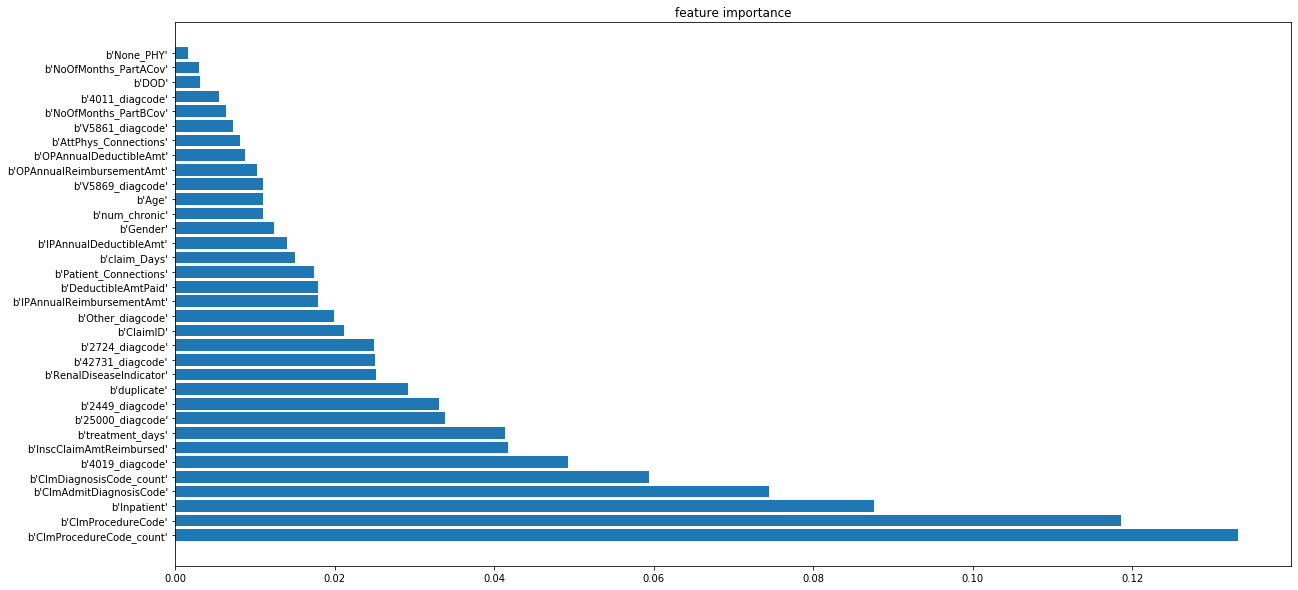

In [346]:
featureNames, featureScores = zip(*list(feature_sort))
plt.figure(figsize=(20,10))
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
plt.title('feature importance')